<a href="https://colab.research.google.com/github/deborah-jabes/pets_detection/blob/main/deepLearning_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Load image data from MNIST:**

11493376/11490434 [==============================] - 0s 0us/step


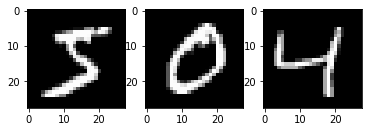

In [ ]:
#import dataset
from keras.datasets import mnist 
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset into train and test sets.
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# plot 3 images as gray scale
plt.subplot(131)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(132)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(133)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()




```
# This is formatted as code
```

**step 2: Import libraries and modules:**



In [ ]:
# import the Sequential model type from Keras.This is simply a linear stack of neural network layers
from keras.models import Sequential 
# import the "core" layers from Keras. These are the layers that are used in almost any neural network
from keras.layers import Dense, Activation 
# import some utilities. This will help us transform our data later
from keras.utils import np_utils

**Step 3: Preprocess input data for Keras:**

In [ ]:
# We can look at the shape of the dataset
print (X_train.shape)

(60000, 28, 28)


In [ ]:
# we want to transform our dataset from having shape (n, width, height) to (n, 784) 28*28*1. 2D to 1D or flat
# The next step for the input data is to convert our data type to float32. 
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [ ]:
# normalize inputs from 0-255 to 0-1 (normalize our data values to the range [0, 1].)

X_train = X_train / 255
X_test = X_test / 255

**Step 4: Preprocess class labels for Keras:**

In [ ]:
# Labels(y_train and y_test) are not split into 10 distinct class labels
print (y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


Keras expects the training targets to be 10-dimensional vectors, since there are 10 nodes in our Softmax output layer, but we’re instead supplying a single integer representing the class for each image.

Conveniently, Keras has a utility method that fixes this exact issue: **to_categorical**: It turns our array of class integers into an array of one-hot vectors instead. 

For example, 2 would become [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] (it’s zero-indexed).

In [ ]:
# One hot encode outputs - Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:

print (y_train.shape)

(60000, 10)


**Step 5:  Define model architecture:**

In [ ]:
model = Sequential([
    Dense(10,input_shape=(784,)),
    Activation('softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


**Step 6: Compile model:**

Before we can begin training, we need to configure the training process. We decide 3 key factors during the compilation step:


1.   The optimizer. We’ll stick with a pretty good default: the Adam gradient-based optimizer. Keras has many other optimizers[ you can look into as well.](https://keras.io/api/optimizers/)

2.   The loss function. Since we’re using a Softmax output layer, we’ll use the Cross-Entropy loss. Keras distinguishes between binary_crossentropy (2 classes) and categorical_crossentropy (>2 classes), so we’ll use the latter. [See all Keras losses.](https://keras.io/api/losses/)

3.  A list of metrics. Since this is a classification problem, we’ll just have Keras report on the accuracy metric.





In [ ]:
# We just need to compile the model and we'll be ready to train it.
# When we compile the model, we declare the loss function and the optimizer (SGD, Adam, etc.).
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])


**Step 7: Fit model on training data:**

Specifying some parameters for fit():

**The training data** (images and labels)( commonly known as X and Y, respectively).

**The number of epochs**(iterations over the entire dataset) to train for.

**The batch size**(number of samples per gradient update) to use when training.

In [ ]:
# To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 5s 3ms/step - loss: 0.9635 - accuracy: 0.7551 - val_loss: 0.3617 - val_accuracy: 0.9067
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3581 - accuracy: 0.9027 - val_loss: 0.3072 - val_accuracy: 0.9156
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3204 - accuracy: 0.9117 - val_loss: 0.2911 - val_accuracy: 0.9205
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.9161 - val_loss: 0.2801 - val_accuracy: 0.9220
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2820 - accuracy: 0.9217 - val_loss: 0.2773 - val_accuracy: 0.9228
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2809 - accuracy: 0.9220 - val_loss: 0.2727 - val_accuracy: 0.9240
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2731 - accuracy: 0.9235 - val_loss: 0.2691 - val_accuracy: 0.9245
Epoch 

**Step 8: Evaluate model on test data:**

In [ ]:
# Finally, we can evaluate our model on the test data:
score = model.evaluate(X_test, y_test, verbose=0)

print (f' The error {score[0]} and accuracy {score[1]} for testing dataset!')

 The error 0.2652268707752228 and accuracy 0.9262999892234802 for testing dataset!


# Put all line of code together - Adding more layers with different activation functions:



In [ ]:
import numpy as np
from keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data() 


# Normalize the images.
X_train = X_train / 255
X_test = X_test / 255

# Flatten the images.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  X_train,
  to_categorical(y_train),
  epochs=5,
  batch_size=32,
)

# Finally, we can evaluate our model on the test data:
score = model.evaluate(X_test,
                       to_categorical(y_test),
                       verbose=0)


print (f' The error {score[0]} and accuracy {score[1]} for testing dataset!')

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4958 - accuracy: 0.8584
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1246 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0853 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0687 - accuracy: 0.9783
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0523 - accuracy: 0.9840
 The error 0.09177102148532867 and accuracy 0.9711999893188477 for testing dataset!
